# Random Forest

In [1]:
import pandas as pd
import numpy as np
import random

In [2]:
train = pd.read_csv("../cleaned_data/train_clean.csv")
valid = pd.read_csv("../cleaned_data/validation_clean.csv")
test = pd.read_csv("../cleaned_data/test_clean.csv")

combined = pd.concat([valid, test], ignore_index=True)

In [3]:
combined

,student_id,tasks_use_model,academic_use_likelihood,suboptimal_frequency,suboptimal_example,reference_expectation,verify_frequency,verify_method,label,best_task_types_brainstorming_or_generating_creative_ideas,...,best_task_types_writing_or_debugging_code,best_task_types_writing_or_editing_essays_reports,suboptimal_task_types_brainstorming_or_generating_creative_ideas,suboptimal_task_types_converting_content_between_formats,suboptimal_task_types_data_processing_or_analysis,suboptimal_task_types_drafting_professional_text,suboptimal_task_types_explaining_complex_concepts_simply,suboptimal_task_types_math_computations,suboptimal_task_types_writing_or_debugging_code,suboptimal_task_types_writing_or_editing_essays_reports
0,10,Search Engine Tasks,3,4.0,The response is fairly short,5.0,5.0,Use [ANOTHER MODEL],0,1,...,1,0,0,0,1,0,0,1,1,0
1,10,Coding Task,1,3.0,Too long,2.0,2.0,Use Google [ANOTHER MODEL],1,0,...,1,0,0,0,0,0,0,1,0,0
2,10,Writing Tasks,2,3.0,Too complex context,2.0,4.0,Use [ANOTHER MODEL],2,1,...,0,0,0,0,0,0,1,0,0,0
3,11,solve math problems,5,2.0,sometimes when I ask [THIS MODEL] to covert my...,5.0,5.0,First I will follow the process provided from ...,0,1,...,1,0,0,1,0,0,0,0,0,0
4,11,I never use this model before. So this questio...,1,1.0,I never use this model before. So this questio...,1.0,1.0,I never use this model before. So this questio...,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
244,254,I would use this model for coding tasks,3,3.0,The model gives a suboptimal response for writ...,2.0,4.0,I try the code myself,1,0,...,1,0,0,0,0,0,0,0,1,0
245,254,I would use this model to verify current infor...,2,3.0,The model gives a suboptimal response for math...,4.0,4.0,I search it up,2,1,...,0,0,0,0,1,0,0,1,1,0
246,268,I tend to use [THIS MODEL] for 2 main tasks: ...,4,4.0,"When writing code, it sometimes gives wrong re...",4.0,5.0,"For code based prompts, I always make sure to ...",0,0,...,1,0,1,0,0,1,0,1,0,1
247,268,I tend to use [ANOTHER MODEL] for 2 main tasks...,2,3.0,"When writing code, it sometimes gives wrong re...",3.0,4.0,"For code based prompts, I always make sure to ...",1,0,...,1,0,1,0,0,0,0,0,0,0


In [4]:
train

,student_id,tasks_use_model,academic_use_likelihood,suboptimal_frequency,suboptimal_example,reference_expectation,verify_frequency,verify_method,label,best_task_types_brainstorming_or_generating_creative_ideas,...,best_task_types_writing_or_debugging_code,best_task_types_writing_or_editing_essays_reports,suboptimal_task_types_brainstorming_or_generating_creative_ideas,suboptimal_task_types_converting_content_between_formats,suboptimal_task_types_data_processing_or_analysis,suboptimal_task_types_drafting_professional_text,suboptimal_task_types_explaining_complex_concepts_simply,suboptimal_task_types_math_computations,suboptimal_task_types_writing_or_debugging_code,suboptimal_task_types_writing_or_editing_essays_reports
0,1,"General purpose tasks, like translating text, ...",3,3.0,I find that [THIS MODEL] has too much watering...,1.0,4.0,I double check with google searches or find fo...,0,0,...,0,1,1,1,0,0,1,0,1,0
1,1,Coding,4,3.0,Many times when i try to get [THIS MODEL] to d...,1.0,5.0,I make sure that the code it writes is well wr...,1,0,...,1,0,1,0,0,1,1,1,0,0
2,1,"Math, coding sometimes",3,4.0,[THIS MODEL] likes to put a lot of words and e...,2.0,3.0,I make sure the facts its giving is correct. s...,2,0,...,0,0,1,0,1,1,0,0,0,0
3,2,"General first case go-to, catch-all type of m...",5,4.0,"Gave it the main ideas I wanted included, but...",3.0,2.0,Ask model to verify and doublecheck itself mu...,0,1,...,0,1,0,0,1,1,0,0,1,1
4,2,Coding/debugging Problem-solving Coming up ...,4,4.0,Explain a complex concept Just restated the ...,2.0,1.0,NaN,1,0,...,1,0,1,1,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,274,Mostly code writing.,3,2.0,"Often, when asking it to create simple scripts...",3.0,4.0,I mainly use this model to write code. When it...,1,0,...,1,0,0,0,1,0,0,1,0,0
572,274,Mostly for professional or creative writing.,2,3.0,If asking it to write an email or cover letter...,3.0,4.0,"I read any output produced line by line, befor...",2,1,...,0,1,0,0,0,1,0,0,0,1
573,275,I would use this model for philosophical quest...,5,3.0,"For simple debugging or troubleshooting, it te...",2.0,3.0,"If it is a computation question, I usually hav...",0,1,...,0,1,0,0,0,0,0,1,1,0
574,275,"Complex coding tasks, complicated logic or new...",2,4.0,I asked it to explain something about processe...,3.0,2.0,I would seek information from Google or a diff...,1,0,...,1,0,0,0,0,0,1,0,0,0


In [5]:
import re

text_cols = ["tasks_use_model", "suboptimal_example", "verify_method"]

def clean_text(s):
    # Convert input to string, handling NaNs, floats, etc.
    if s is None:
        s = ""
    s = str(s)  
    
    # Your original cleaning logic
    s = s.lower()
    s = re.sub(r"[^a-z0-9\s]", " ", s)
    s = re.sub(r"\s+", " ", s)
    return s.strip()

for col in text_cols:
    # Use .astype(str) on the column before applying for extra safety, 
    # or just use the improved clean_text function.
    train[col] = train[col].apply(clean_text) 
    valid[col] = valid[col].apply(clean_text)
    test[col] = test[col].apply(clean_text)
    combined[col] = combined[col].apply(clean_text)

In [6]:
train

,student_id,tasks_use_model,academic_use_likelihood,suboptimal_frequency,suboptimal_example,reference_expectation,verify_frequency,verify_method,label,best_task_types_brainstorming_or_generating_creative_ideas,...,best_task_types_writing_or_debugging_code,best_task_types_writing_or_editing_essays_reports,suboptimal_task_types_brainstorming_or_generating_creative_ideas,suboptimal_task_types_converting_content_between_formats,suboptimal_task_types_data_processing_or_analysis,suboptimal_task_types_drafting_professional_text,suboptimal_task_types_explaining_complex_concepts_simply,suboptimal_task_types_math_computations,suboptimal_task_types_writing_or_debugging_code,suboptimal_task_types_writing_or_editing_essays_reports
0,1,general purpose tasks like translating text re...,3,3.0,i find that this model has too much watering d...,1.0,4.0,i double check with google searches or find fo...,0,0,...,0,1,1,1,0,0,1,0,1,0
1,1,coding,4,3.0,many times when i try to get this model to do ...,1.0,5.0,i make sure that the code it writes is well wr...,1,0,...,1,0,1,0,0,1,1,1,0,0
2,1,math coding sometimes,3,4.0,this model likes to put a lot of words and exp...,2.0,3.0,i make sure the facts its giving is correct sa...,2,0,...,0,0,1,0,1,1,0,0,0,0
3,2,general first case go to catch all type of mod...,5,4.0,gave it the main ideas i wanted included but r...,3.0,2.0,ask model to verify and doublecheck itself mul...,0,1,...,0,1,0,0,1,1,0,0,1,1
4,2,coding debugging problem solving coming up wit...,4,4.0,explain a complex concept just restated the co...,2.0,1.0,nan,1,0,...,1,0,1,1,1,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
571,274,mostly code writing,3,2.0,often when asking it to create simple scripts ...,3.0,4.0,i mainly use this model to write code when it ...,1,0,...,1,0,0,0,1,0,0,1,0,0
572,274,mostly for professional or creative writing,2,3.0,if asking it to write an email or cover letter...,3.0,4.0,i read any output produced line by line before...,2,1,...,0,1,0,0,0,1,0,0,0,1
573,275,i would use this model for philosophical quest...,5,3.0,for simple debugging or troubleshooting it ten...,2.0,3.0,if it is a computation question i usually have...,0,1,...,0,1,0,0,0,0,0,1,1,0
574,275,complex coding tasks complicated logic or new ...,2,4.0,i asked it to explain something about processe...,3.0,2.0,i would seek information from google or a diff...,1,0,...,1,0,0,0,0,0,1,0,0,0


# Test 1 Training a Random Forest without bag of words encoding of the full text vocab. Using the already processed one hot vector for certain keywords

In [7]:
train.columns

Index(['student_id', 'tasks_use_model', 'academic_use_likelihood',
       'suboptimal_frequency', 'suboptimal_example', 'reference_expectation',
       'verify_frequency', 'verify_method', 'label',
       'best_task_types_brainstorming_or_generating_creative_ideas',
       'best_task_types_converting_content_between_formats',
       'best_task_types_data_processing_or_analysis',
       'best_task_types_drafting_professional_text',
       'best_task_types_explaining_complex_concepts_simply',
       'best_task_types_math_computations',
       'best_task_types_writing_or_debugging_code',
       'best_task_types_writing_or_editing_essays_reports',
       'suboptimal_task_types_brainstorming_or_generating_creative_ideas',
       'suboptimal_task_types_converting_content_between_formats',
       'suboptimal_task_types_data_processing_or_analysis',
       'suboptimal_task_types_drafting_professional_text',
       'suboptimal_task_types_explaining_complex_concepts_simply',
       'suboptimal_t

In [8]:
train_data = np.stack([train['academic_use_likelihood'], 
                        train['suboptimal_frequency'], 
                        train['reference_expectation'],
                        train['verify_frequency'],
                        train['best_task_types_brainstorming_or_generating_creative_ideas'],
                        train['best_task_types_converting_content_between_formats'],
                        train['best_task_types_data_processing_or_analysis'],
                        train['best_task_types_drafting_professional_text'],
                        train['best_task_types_explaining_complex_concepts_simply'],
                        train['best_task_types_math_computations'],
                        train['best_task_types_writing_or_debugging_code'],
                        train['best_task_types_writing_or_editing_essays_reports'],
                        train['suboptimal_task_types_brainstorming_or_generating_creative_ideas'],
                        train['suboptimal_task_types_converting_content_between_formats'],
                        train['suboptimal_task_types_data_processing_or_analysis'],
                        train['suboptimal_task_types_drafting_professional_text'],
                        train['suboptimal_task_types_explaining_complex_concepts_simply'],
                        train['suboptimal_task_types_math_computations'],
                        train['suboptimal_task_types_writing_or_debugging_code'],
                        train['suboptimal_task_types_writing_or_editing_essays_reports']
                     ], axis = 1)

train_t = np.stack([train['label']], axis=1).reshape(-1)

In [9]:
combined_data = np.stack([combined['academic_use_likelihood'], 
                        combined['suboptimal_frequency'], 
                        combined['reference_expectation'],
                        combined['verify_frequency'],
                        combined['best_task_types_brainstorming_or_generating_creative_ideas'],
                        combined['best_task_types_converting_content_between_formats'],
                        combined['best_task_types_data_processing_or_analysis'],
                        combined['best_task_types_drafting_professional_text'],
                        combined['best_task_types_explaining_complex_concepts_simply'],
                        combined['best_task_types_math_computations'],
                        combined['best_task_types_writing_or_debugging_code'],
                        combined['best_task_types_writing_or_editing_essays_reports'],
                        combined['suboptimal_task_types_brainstorming_or_generating_creative_ideas'],
                        combined['suboptimal_task_types_converting_content_between_formats'],
                        combined['suboptimal_task_types_data_processing_or_analysis'],
                        combined['suboptimal_task_types_drafting_professional_text'],
                        combined['suboptimal_task_types_explaining_complex_concepts_simply'],
                        combined['suboptimal_task_types_math_computations'],
                        combined['suboptimal_task_types_writing_or_debugging_code'],
                        combined['suboptimal_task_types_writing_or_editing_essays_reports']
                     ], axis = 1)

combined_t = np.stack([combined['label']], axis=1).reshape(-1)

In [10]:
def estimate_variance(model, x_train, t_train, x_valid, t_valid, ntries=100, nsample=200):
    """
    Estimate the variance of a classifier on the NHANES data set.

    Parameters:
        `model` - an sklearn model supporting the methods fit(), 
                  predict(), and score()
        `ntries` - number of times to train the classifier to compute
                   the classifier's variance.
        `nsamples` - number of data points to sample to train each
                     classifier

    Returns: A tuple containing the average training error,
             average validation error, and variance estimate.
    """
    train_acc = []
    val_acc = []
    ys = []
    for i in range(ntries):
        subset = random.sample(range(x_train.shape[0]), nsample)
        model.fit(x_train[subset], t_train[subset])
        ys.append(model.predict(x_valid))
        train_acc.append(model.score(x_train[subset], t_train[subset]))
        val_acc.append(model.score(x_valid, t_valid))
    ys = np.stack(ys)
    variances = np.var(ys, axis=0) # TODO: Compute the variance of each row of ys, i.e., for 
                     #       each validation data point separate. (Why? Why can't
                     #       we compute the variance of the entire ys?)
    train_error = np.mean(train_acc) # TODO: the average training error across the ntries models
    val_error = np.mean(val_acc) # TODO: the average validation error across the ntries models
    return train_error, val_error, variances.mean()

In [11]:
from sklearn.ensemble import RandomForestClassifier

forest_res = []
num_trees = [1, 2, 5, 10, 25, 50]
for n in num_trees:
    model = RandomForestClassifier(n_estimators=n)
    train_error, val_error, variance = estimate_variance(model, train_data, train_t, combined_data, combined_t,
                                                         ntries=10, nsample=50)
    forest_res.append([train_error, val_error, variance])

In [12]:
import matplotlib.pyplot as plt

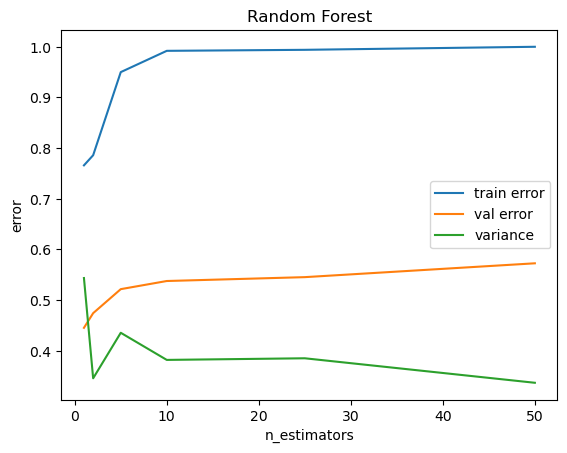

In [13]:
plt.title("Random Forest")
plt.plot(num_trees, [r[0] for r in forest_res], label="train error")
plt.plot(num_trees, [r[1] for r in forest_res], label="val error")
plt.plot(num_trees, [r[2] for r in forest_res], label="variance")
plt.ylabel("error")
plt.xlabel("n_estimators")
plt.legend()
plt.show()

In [14]:
model = RandomForestClassifier(n_estimators=50)
model.fit(train_data, train_t)
print("Training Accuracy:", model.score(train_data, train_t))
print("Validation Accuracy:", model.score(combined_data, combined_t))

Training Accuracy: 0.9826388888888888
Validation Accuracy: 0.6465863453815262


Starting Random Forest Grid Search...

--- Testing max_depth=5 ---
  Estimators:  20 | Combined Test Acc: 0.6265
  Estimators:  40 | Combined Test Acc: 0.6466
  Estimators:  60 | Combined Test Acc: 0.6627
  Estimators:  80 | Combined Test Acc: 0.6546
  Estimators: 100 | Combined Test Acc: 0.6586

--- Testing max_depth=15 ---
  Estimators:  20 | Combined Test Acc: 0.6265
  Estimators:  40 | Combined Test Acc: 0.6145
  Estimators:  60 | Combined Test Acc: 0.6305
  Estimators:  80 | Combined Test Acc: 0.6305
  Estimators: 100 | Combined Test Acc: 0.6305

--- Testing max_depth=30 ---
  Estimators:  20 | Combined Test Acc: 0.6345
  Estimators:  40 | Combined Test Acc: 0.5984
  Estimators:  60 | Combined Test Acc: 0.6225
  Estimators:  80 | Combined Test Acc: 0.6305
  Estimators: 100 | Combined Test Acc: 0.6345

--- Testing max_depth=None ---
  Estimators:  20 | Combined Test Acc: 0.6345
  Estimators:  40 | Combined Test Acc: 0.5984
  Estimators:  60 | Combined Test Acc: 0.6225
  Estimators:

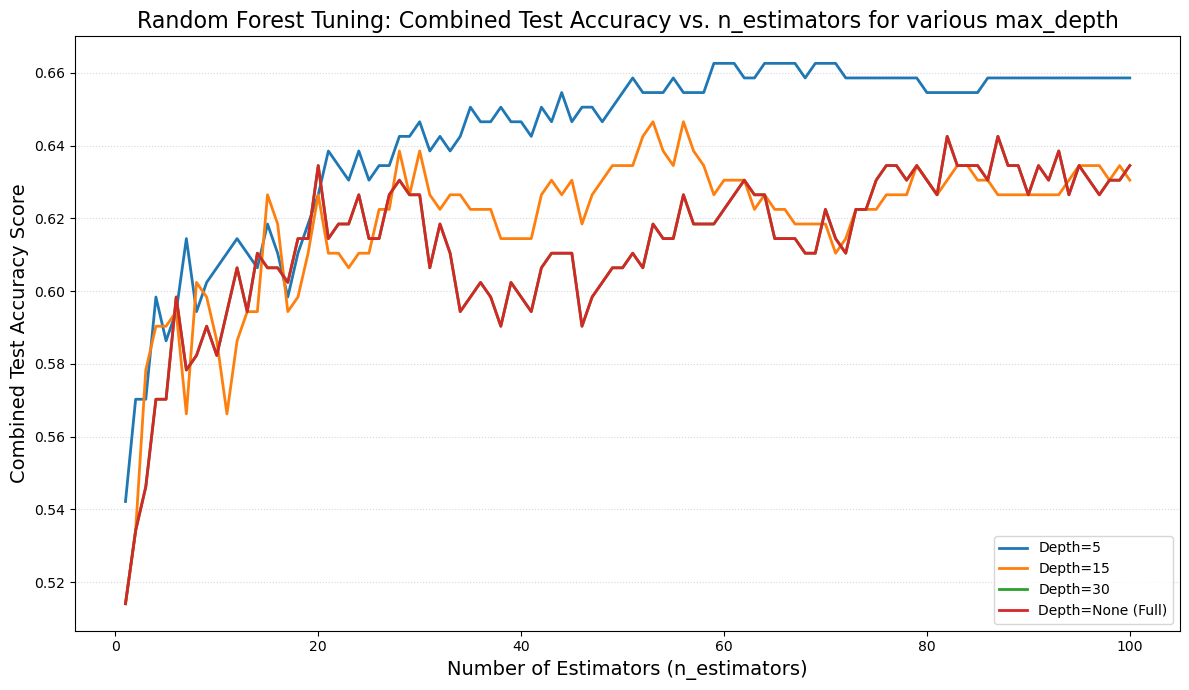

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# --- 1. Data Setup (Using your confirmed dimensions) ---
# The actual number of features based on your combined data shape
INPUT_SIZE = 20 
NUM_TRAIN = 576
NUM_COMBINED = 249
NUM_CLASSES = 3

# Assuming these DataFrames/Series exist from previous steps
X_train = train_data
y_train = train_t
X_combined = combined_data
y_combined = combined_t


# --- 2. Hyperparameter Grid and Metric Storage ---
MAX_DEPTHS_TO_TEST = [5, 15, 30, None] # Test shallow, medium, deep, and default (fully grown)
N_ESTIMATORS_RANGE = range(1, 101)

# Nested dictionary to store all metrics: {depth: {metric_name: [values]}}
# FIX 1: Initializing the dictionary with the correct key 'combined'
all_metrics = {depth: {'train': [], 'combined': []} for depth in MAX_DEPTHS_TO_TEST}

print("Starting Random Forest Grid Search...")

# --- 3. Nested Training Loops (Grid Search) ---
for depth in MAX_DEPTHS_TO_TEST:
    
    print(f"\n--- Testing max_depth={depth} ---")
    
    for n_est in N_ESTIMATORS_RANGE:
        
        # Initialize the model with the current depth and estimator count
        model = RandomForestClassifier(
            n_estimators=n_est, 
            max_depth=depth,
            random_state=42, 
            n_jobs=-1
        )
        
        # Fit the model
        model.fit(X_train, y_train)
        
        # Calculate scores
        train_acc = model.score(X_train, y_train)
        combined_test_acc = model.score(X_combined, y_combined)
        
        # Store results
        # This storage key is correct: 'combined'
        all_metrics[depth]['train'].append(train_acc)
        all_metrics[depth]['combined'].append(combined_test_acc)
        
        if n_est % 20 == 0:
            print(f"  Estimators: {n_est:3d} | Combined Test Acc: {combined_test_acc:.4f}")


# --- 4. Matplotlib Plotting ---

plt.figure(figsize=(12, 7))

# Plot the Combined Test Accuracy for each tested Max Depth
for depth, metrics in all_metrics.items():
    label_text = f'Depth={depth}' if depth is not None else 'Depth=None (Full)'
    
    # FIX 2: Change the key from 'val' to 'combined' to access stored scores
    plt.plot(N_ESTIMATORS_RANGE, metrics['combined'], label=label_text, linewidth=2)
    
    # Find the maximum combined test score for this depth
    # FIX 3: Change the key from 'val' to 'combined'
    max_combined_acc = max(metrics['combined'])
    optimal_n = N_ESTIMATORS_RANGE[metrics['combined'].index(max_combined_acc)]
    
    # Print the best result for reference
    # FIX 4: Update print statement for clarity
    print(f"\nBest result for Max Depth={depth}:")
    print(f"  Optimal n_estimators: {optimal_n}, Max Combined Test Acc: {max_combined_acc:.4f}")

# FIX 5: Update the plot title and y-axis label for consistency
plt.title('Random Forest Tuning: Combined Test Accuracy vs. n_estimators for various max_depth', fontsize=16)
plt.xlabel('Number of Estimators (n_estimators)', fontsize=14)
plt.ylabel('Combined Test Accuracy Score', fontsize=14)
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='dotted', alpha=0.5)
plt.tight_layout()
plt.show()

In [16]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(fit_intercept=False)

lr.fit(train_data, train_t)
 
print(f"Training accuracy: {lr.score(train_data, train_t)}")
print(f"Validation accuracy: {lr.score(combined_data, combined_t)}")

Training accuracy: 0.6440972222222222
Validation accuracy: 0.6305220883534136


In [17]:
train_data

array([[3., 3., 1., ..., 0., 1., 0.],
       [4., 3., 1., ..., 1., 0., 0.],
       [3., 4., 2., ..., 0., 0., 0.],
       ...,
       [5., 3., 2., ..., 1., 1., 0.],
       [2., 4., 3., ..., 0., 0., 0.],
       [1., 2., 3., ..., 0., 0., 0.]], shape=(576, 20))

In [18]:
train_t.shape

(576,)

# Test 2 Training a Random Forest with bag of words for the entire vocab of potential words

In [19]:
train.columns

Index(['student_id', 'tasks_use_model', 'academic_use_likelihood',
       'suboptimal_frequency', 'suboptimal_example', 'reference_expectation',
       'verify_frequency', 'verify_method', 'label',
       'best_task_types_brainstorming_or_generating_creative_ideas',
       'best_task_types_converting_content_between_formats',
       'best_task_types_data_processing_or_analysis',
       'best_task_types_drafting_professional_text',
       'best_task_types_explaining_complex_concepts_simply',
       'best_task_types_math_computations',
       'best_task_types_writing_or_debugging_code',
       'best_task_types_writing_or_editing_essays_reports',
       'suboptimal_task_types_brainstorming_or_generating_creative_ideas',
       'suboptimal_task_types_converting_content_between_formats',
       'suboptimal_task_types_data_processing_or_analysis',
       'suboptimal_task_types_drafting_professional_text',
       'suboptimal_task_types_explaining_complex_concepts_simply',
       'suboptimal_t

In [20]:
# Combine text columns into a single column because Naive Bayes works on a single text input
text_cols = ["tasks_use_model", "suboptimal_example", "verify_method"]

def combine_text(df):
    df["full_text"] = df[text_cols].fillna("").agg(" ".join, axis=1)
    return df

train = combine_text(train)
valid = combine_text(valid)
test = combine_text(test)
combined = combine_text(combined)

In [21]:
combined_text = train['full_text'] + test['full_text'] + valid['full_text']

In [27]:
from collections import Counter

def create_bow_features_with_top_n_words(train_df, combined_df, top_n=100):
    """
    Creates bag-of-words features using only the top N most common words.
    Combines BoW features with other numerical features.
    
    Parameters:
    -----------
    train_df : pandas.DataFrame
        Training dataframe with 'full_text' column and other feature columns
    combined_df : pandas.DataFrame
        Combined validation/test dataframe with 'full_text' column and other feature columns
    top_n : int, default=100
        Number of most common words to include in vocabulary
        
    Returns:
    --------
    X_train : numpy.ndarray
        Training features (BoW + other features)
    X_combined : numpy.ndarray
        Combined validation/test features (BoW + other features)
    y_train : numpy.ndarray
        Training labels
    y_combined : numpy.ndarray
        Combined validation/test labels
    vocab_vector : numpy.ndarray
        The vocabulary of top N words used
    """
    # Step 1: Get all text from training data to build vocabulary
    full_corpus = train_df['full_text'].str.cat(sep=' ')
    all_words = full_corpus.split()
    
    # Step 2: Count word frequencies and get top N most common words
    word_counts = Counter(all_words)
    top_words = [word for word, count in word_counts.most_common(top_n)]
    vocab_vector = np.array(top_words)
    
    print(f"Created vocabulary with top {top_n} words (vocab size: {len(vocab_vector)})")
    
    # Step 3: Create vocabulary map for fast lookup
    vocab_map = {word: i for i, word in enumerate(vocab_vector)}
    vocab_size = len(vocab_vector)
    
    # Step 4: Encode text to bag-of-words (only counting words in vocab)
    def encode_text_to_bow(text_series, vocab_map, vocab_size):
        """Converts text series to bag-of-words using only words in vocab_map"""
        num_documents = len(text_series)
        X_bow = np.zeros((num_documents, vocab_size), dtype=np.int32)
        
        for doc_index, document in enumerate(text_series):
            words = document.split()
            for word in words:
                if word in vocab_map:  # Only count words in our top N vocabulary
                    word_index = vocab_map[word]
                    X_bow[doc_index, word_index] += 1
        
        return X_bow
    
    # Step 5: Create BoW features for train and combined
    X_train_bow = encode_text_to_bow(train_df['full_text'], vocab_map, vocab_size)
    X_combined_bow = encode_text_to_bow(combined_df['full_text'], vocab_map, vocab_size)
    
    # Step 6: Get other numerical features
    feature_cols = ['academic_use_likelihood',
                    'suboptimal_frequency',
                    'reference_expectation',
                    'verify_frequency',
                    'best_task_types_brainstorming_or_generating_creative_ideas',
                    'best_task_types_converting_content_between_formats',
                    'best_task_types_data_processing_or_analysis',
                    'best_task_types_drafting_professional_text',
                    'best_task_types_explaining_complex_concepts_simply',
                    'best_task_types_math_computations',
                    'best_task_types_writing_or_debugging_code',
                    'best_task_types_writing_or_editing_essays_reports',
                    'suboptimal_task_types_brainstorming_or_generating_creative_ideas',
                    'suboptimal_task_types_converting_content_between_formats',
                    'suboptimal_task_types_data_processing_or_analysis',
                    'suboptimal_task_types_drafting_professional_text',
                    'suboptimal_task_types_explaining_complex_concepts_simply',
                    'suboptimal_task_types_math_computations',
                    'suboptimal_task_types_writing_or_debugging_code',
                    'suboptimal_task_types_writing_or_editing_essays_reports']
    
    train_features = train_df[feature_cols].values
    combined_features = combined_df[feature_cols].values
    
    # Step 7: Combine BoW features with other features
    X_train = np.hstack([train_features, X_train_bow])
    X_combined = np.hstack([combined_features, X_combined_bow])
    
    # Step 8: Get labels
    y_train = train_df['label'].values
    y_combined = combined_df['label'].values
    
    print(f"Final feature shape - Train: {X_train.shape}, Combined: {X_combined.shape}")
    
    return X_train, X_combined, y_train, y_combined, vocab_vector

# Example usage with top 100 words (default)
X_train, X_combined, y_train, y_combined, vocab_vector = create_bow_features_with_top_n_words(
    train, combined, top_n=100
)

Created vocabulary with top 100 words (vocab size: 100)
Final feature shape - Train: (576, 120), Combined: (249, 120)


In [28]:
X_train

array([[3., 3., 1., ..., 0., 0., 2.],
       [4., 3., 1., ..., 0., 0., 0.],
       [3., 4., 2., ..., 1., 0., 0.],
       ...,
       [5., 3., 2., ..., 0., 0., 0.],
       [2., 4., 3., ..., 0., 0., 0.],
       [1., 2., 3., ..., 0., 0., 0.]], shape=(576, 120))

In [29]:
# Parameter sweep example: Testing different top_n words combined with Random Forest hyperparameters
from sklearn.ensemble import RandomForestClassifier

# Define parameter ranges to test
TOP_N_WORDS_TO_TEST = [50, 100, 200, 500]  # Different vocabulary sizes
MAX_DEPTHS_TO_TEST = [5, 15, 30, None]     # Different tree depths
N_ESTIMATORS_RANGE = range(1, 101)          # Number of trees

# Storage for results
results = []

print("Starting parameter sweep: Top N words × Random Forest hyperparameters")
print("=" * 70)

for top_n in TOP_N_WORDS_TO_TEST:
    print(f"\n{'='*70}")
    print(f"Testing with top_n = {top_n} words")
    print(f"{'='*70}")
    
    # Create features with current top_n
    X_train, X_combined, y_train, y_combined, vocab = create_bow_features_with_top_n_words(
        train, combined, top_n=top_n
    )
    
    # Test different max_depth values
    for depth in MAX_DEPTHS_TO_TEST:
        print(f"\n  Testing max_depth={depth}")
        
        best_acc = 0
        best_n_est = 0
        
        # Test different n_estimators
        for n_est in N_ESTIMATORS_RANGE:
            model = RandomForestClassifier(
                n_estimators=n_est,
                max_depth=depth,
                random_state=42,
                n_jobs=-1
            )
            
            model.fit(X_train, y_train)
            combined_acc = model.score(X_combined, y_combined)
            
            # Track best result for this depth
            if combined_acc > best_acc:
                best_acc = combined_acc
                best_n_est = n_est
            
            # Store all results
            results.append({
                'top_n': top_n,
                'max_depth': depth,
                'n_estimators': n_est,
                'train_acc': model.score(X_train, y_train),
                'combined_acc': combined_acc
            })
        
        print(f"    Best: n_estimators={best_n_est}, Combined Acc={best_acc:.4f}")

# Convert results to DataFrame for easy analysis
results_df = pd.DataFrame(results)
print("\n" + "="*70)
print("Parameter Sweep Complete!")
print("="*70)
print("\nBest overall result:")
best_idx = results_df['combined_acc'].idxmax()
print(results_df.loc[best_idx])


Starting parameter sweep: Top N words × Random Forest hyperparameters

Testing with top_n = 50 words
Created vocabulary with top 50 words (vocab size: 50)
Final feature shape - Train: (576, 70), Combined: (249, 70)

  Testing max_depth=5
    Best: n_estimators=25, Combined Acc=0.6627

  Testing max_depth=15
    Best: n_estimators=80, Combined Acc=0.6667

  Testing max_depth=30
    Best: n_estimators=41, Combined Acc=0.6787

  Testing max_depth=None
    Best: n_estimators=41, Combined Acc=0.6787

Testing with top_n = 100 words
Created vocabulary with top 100 words (vocab size: 100)
Final feature shape - Train: (576, 120), Combined: (249, 120)

  Testing max_depth=5
    Best: n_estimators=43, Combined Acc=0.6948

  Testing max_depth=15
    Best: n_estimators=30, Combined Acc=0.6586

  Testing max_depth=30
    Best: n_estimators=76, Combined Acc=0.6908

  Testing max_depth=None
    Best: n_estimators=76, Combined Acc=0.6908

Testing with top_n = 200 words
Created vocabulary with top 200 w

In [11]:
vocab_vector

array(['0', '00', '01', ..., 'your', 'youtube', 'zero'],
      shape=(2735,), dtype='<U23')

In [ ]:
import numpy as np

def encode_text_to_bow(text_series, vocab_vector):
    """
    Converts a pandas Series of text into a raw Bag-of-Words count NumPy array
    based on a provided vocabulary.
    """
    
    # 1. Create a dictionary map for fast vocabulary lookup
    # This maps the word to its column index in the final matrix
    vocab_map = {word: i for i, word in enumerate(vocab_vector)}
    vocab_size = len(vocab_vector)
    num_documents = len(text_series)
    
    # Initialize the count matrix (BoW)
    # Using integer type for simple counts
    X_bow = np.zeros((num_documents, vocab_size), dtype=np.int32)
    
    # 2. Fill the BoW count matrix
    for doc_index, document in enumerate(text_series):
        # The text is assumed to be cleaned and lowercased already
        words = document.split()
        
        for word in words:
            if word in vocab_map:
                word_index = vocab_map[word]
                # Increment the count for this word in this document
                X_bow[doc_index, word_index] += 1
                
    return X_bow

# --- APPLICATION ---

# 1. Apply the function to your combined text columns
# (Assuming vocab_vector is ready from the previous step)
X_train_bow = encode_text_to_bow(train['full_text'], vocab_vector)
X_combined_bow = encode_text_to_bow(combined['full_text'], vocab_vector)

print(f"Shape of Training BoW Matrix: {X_train_bow.shape}")
print(f"Example of first row (document counts): {X_train_bow[0, :5]}")

Shape of Training BoW Matrix: (576, 2735)
Example of first row (document counts): [0 0 0 0 0]


In [ ]:
train_encoded = pd.DataFrame([train['academic_use_likelihood'], 
                        train['suboptimal_frequency'], 
                        train['reference_expectation'],
                        train['verify_frequency']]).transpose()

combined_encoded = pd.DataFrame([combined['academic_use_likelihood'], 
                        combined['suboptimal_frequency'], 
                        combined['reference_expectation'],
                        combined['verify_frequency']]).transpose()

In [15]:
X_combined_bow

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(249, 2735), dtype=int32)

In [16]:
combined_encoded

,academic_use_likelihood,suboptimal_frequency,reference_expectation,verify_frequency
0,3.0,4.0,5.0,5.0
1,1.0,3.0,2.0,2.0
2,2.0,3.0,2.0,4.0
3,5.0,2.0,5.0,5.0
4,1.0,1.0,1.0,1.0
...,...,...,...,...
244,3.0,3.0,2.0,4.0
245,2.0,3.0,4.0,4.0
246,4.0,4.0,4.0,5.0
247,2.0,3.0,3.0,4.0


In [17]:
train_encoded = pd.concat([train_encoded, pd.DataFrame(X_train_bow)],ignore_index=True, sort=False, axis=1)

In [18]:
combined_encoded = pd.concat([combined_encoded, pd.DataFrame(X_combined_bow)],ignore_index=True, sort=False, axis=1)

In [19]:
train_t = np.stack([train['label']], axis=1).reshape(-1)
combined_t = np.stack([combined['label']], axis=1).reshape(-1)

In [20]:
def estimate_variance(model, x_train, t_train, x_combined, t_combined, ntries=100, nsample=200):
    """
    Estimate the variance of a classifier on the NHANES data set.

    Parameters:
        `model` - an sklearn model supporting the methods fit(), 
                  predict(), and score()
        `ntries` - number of times to train the classifier to compute
                   the classifier's variance.
        `nsamples` - number of data points to sample to train each
                     classifier

    Returns: A tuple containing the average training error,
             average validation error, and variance estimate.
    """
    train_acc = []
    val_acc = []
    ys = []
    for i in range(ntries):
        subset = random.sample(range(x_train.shape[0]), nsample)
        model.fit(x_train[subset], t_train[subset])
        ys.append(model.predict(x_combined))
        train_acc.append(model.score(x_train[subset], t_train[subset]))
        val_acc.append(model.score(x_combined, t_combined))
    ys = np.stack(ys)
    variances = np.var(ys, axis=0) # TODO: Compute the variance of each row of ys, i.e., for 
                     #       each validation data point separate. (Why? Why can't
                     #       we compute the variance of the entire ys?)
    train_error = np.mean(train_acc) # TODO: the average training error across the ntries models
    val_error = np.mean(val_acc) # TODO: the average validation error across the ntries models
    return train_error, val_error, variances.mean()

In [22]:
from sklearn.ensemble import RandomForestClassifier

forest_res = []
num_trees = [1, 2, 5, 10, 25, 50]
for n in num_trees:
    model = RandomForestClassifier(n_estimators=n)
    train_error, val_error, variance = estimate_variance(model, train_encoded.to_numpy(), train_t, combined_encoded.to_numpy(), combined_t,
                                                         ntries=10, nsample=50)
    forest_res.append([train_error, val_error, variance])

In [23]:
import matplotlib.pyplot as plt

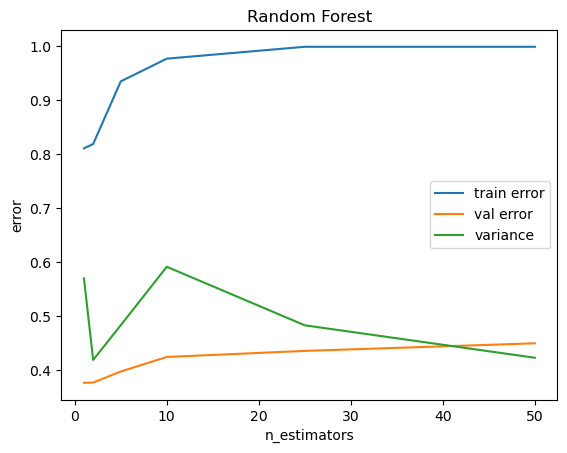

In [24]:
plt.title("Random Forest")
plt.plot(num_trees, [r[0] for r in forest_res], label="train error")
plt.plot(num_trees, [r[1] for r in forest_res], label="val error")
plt.plot(num_trees, [r[2] for r in forest_res], label="variance")
plt.ylabel("error")
plt.xlabel("n_estimators")
plt.legend()
plt.show()

In [31]:
model = RandomForestClassifier(n_estimators=50)
model.fit(train_encoded.to_numpy(), train_t)
print("Training Accuracy:", model.score(train_encoded.to_numpy(), train_t))
print("Combined Test Accuracy:", model.score(combined_encoded.to_numpy(), combined_t))

Training Accuracy: 0.9947916666666666
Combined Test Accuracy: 0.570281124497992


In [32]:
train_encoded.to_numpy().shape

(576, 2739)

In [34]:
combined_encoded.shape

(249, 2739)

Starting Random Forest Grid Search...

--- Testing max_depth=5 ---
  Estimators:  20 | Combined Test Acc: 0.5863
  Estimators:  40 | Combined Test Acc: 0.6064
  Estimators:  60 | Combined Test Acc: 0.6265
  Estimators:  80 | Combined Test Acc: 0.5984
  Estimators: 100 | Combined Test Acc: 0.6104

--- Testing max_depth=15 ---
  Estimators:  20 | Combined Test Acc: 0.5663
  Estimators:  40 | Combined Test Acc: 0.6064
  Estimators:  60 | Combined Test Acc: 0.6185
  Estimators:  80 | Combined Test Acc: 0.6064
  Estimators: 100 | Combined Test Acc: 0.6265

--- Testing max_depth=30 ---
  Estimators:  20 | Combined Test Acc: 0.5221
  Estimators:  40 | Combined Test Acc: 0.5944
  Estimators:  60 | Combined Test Acc: 0.5944
  Estimators:  80 | Combined Test Acc: 0.5984
  Estimators: 100 | Combined Test Acc: 0.5984

--- Testing max_depth=None ---
  Estimators:  20 | Combined Test Acc: 0.5060
  Estimators:  40 | Combined Test Acc: 0.5743
  Estimators:  60 | Combined Test Acc: 0.5743
  Estimators:

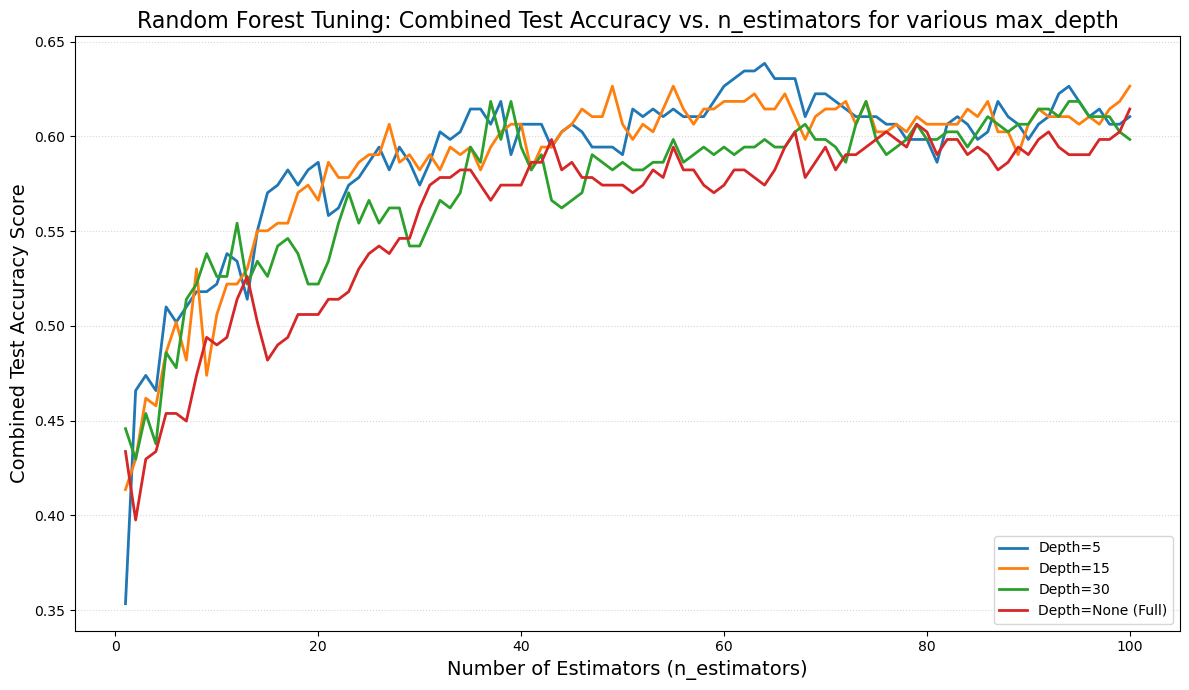

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# --- 1. Data Setup (Using your confirmed dimensions) ---
# The actual number of features based on your combined data shape
INPUT_SIZE = 2739 
NUM_TRAIN = 576
NUM_COMBINED = 249
NUM_CLASSES = 3

# Assuming these DataFrames/Series exist from previous steps
X_train = train_encoded.to_numpy() 
y_train = train_t
X_combined = combined_encoded.to_numpy()
y_combined = combined_t


# --- 2. Hyperparameter Grid and Metric Storage ---
MAX_DEPTHS_TO_TEST = [5, 15, 30, None] # Test shallow, medium, deep, and default (fully grown)
N_ESTIMATORS_RANGE = range(1, 101)

# Nested dictionary to store all metrics: {depth: {metric_name: [values]}}
# FIX 1: Initializing the dictionary with the correct key 'combined'
all_metrics = {depth: {'train': [], 'combined': []} for depth in MAX_DEPTHS_TO_TEST}

print("Starting Random Forest Grid Search...")

# --- 3. Nested Training Loops (Grid Search) ---
for depth in MAX_DEPTHS_TO_TEST:
    
    print(f"\n--- Testing max_depth={depth} ---")
    
    for n_est in N_ESTIMATORS_RANGE:
        
        # Initialize the model with the current depth and estimator count
        model = RandomForestClassifier(
            n_estimators=n_est, 
            max_depth=depth,
            random_state=42, 
            n_jobs=-1
        )
        
        # Fit the model
        model.fit(X_train, y_train)
        
        # Calculate scores
        train_acc = model.score(X_train, y_train)
        combined_test_acc = model.score(X_combined, y_combined)
        
        # Store results
        # This storage key is correct: 'combined'
        all_metrics[depth]['train'].append(train_acc)
        all_metrics[depth]['combined'].append(combined_test_acc)
        
        if n_est % 20 == 0:
            print(f"  Estimators: {n_est:3d} | Combined Test Acc: {combined_test_acc:.4f}")


# --- 4. Matplotlib Plotting ---

plt.figure(figsize=(12, 7))

# Plot the Combined Test Accuracy for each tested Max Depth
for depth, metrics in all_metrics.items():
    label_text = f'Depth={depth}' if depth is not None else 'Depth=None (Full)'
    
    # FIX 2: Change the key from 'val' to 'combined' to access stored scores
    plt.plot(N_ESTIMATORS_RANGE, metrics['combined'], label=label_text, linewidth=2)
    
    # Find the maximum combined test score for this depth
    # FIX 3: Change the key from 'val' to 'combined'
    max_combined_acc = max(metrics['combined'])
    optimal_n = N_ESTIMATORS_RANGE[metrics['combined'].index(max_combined_acc)]
    
    # Print the best result for reference
    # FIX 4: Update print statement for clarity
    print(f"\nBest result for Max Depth={depth}:")
    print(f"  Optimal n_estimators: {optimal_n}, Max Combined Test Acc: {max_combined_acc:.4f}")

# FIX 5: Update the plot title and y-axis label for consistency
plt.title('Random Forest Tuning: Combined Test Accuracy vs. n_estimators for various max_depth', fontsize=16)
plt.xlabel('Number of Estimators (n_estimators)', fontsize=14)
plt.ylabel('Combined Test Accuracy Score', fontsize=14)
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='dotted', alpha=0.5)
plt.tight_layout()
plt.show()